In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import sys
import operator
import re
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pickle

%matplotlib inline

In [ ]:
movies = pd.read_csv("movies.csv")
tags = pd.read_csv("tags.csv")
links = pd.read_csv("links.csv")
ratings = pd.read_csv("ratings.csv")

In [ ]:
genome_tags = pd.read_csv("genome-tags.csv")
genome_scores = pd.read_csv("genome-scores.csv")

In [ ]:
movies.head()

In [ ]:
len(movies)

In [ ]:
genome_tags.head(20)

In [ ]:
genome_scores.head(20)

In [ ]:
inter_merge = pd.merge(genome_scores, genome_tags, on="tagId")

In [ ]:
inter_merge.head()

In [ ]:
len(inter_merge)

In [ ]:
inter_merge.drop("tagId", axis=1, inplace=True)

In [ ]:
wide = pd.pivot(inter_merge, index="movieId", columns="tag", values="relevance")

In [ ]:
wide.reset_index(inplace=True)
wide.head()

In [ ]:
wide.describe()

In [ ]:
wide = wide.rename_axis(None, axis=1)
wide.head()

In [ ]:
wide=wide.astype(np.float32)

In [ ]:
wide.head()

In [ ]:
len(wide)

In [ ]:
merge = pd.merge(movies, wide, on="movieId")

In [ ]:
merge.head()

In [ ]:
len(merge)

In [ ]:
merge.to_csv("merge.csv", index=False)

In [2]:
data = pd.read_csv("merge.csv")

In [3]:
genres_list = list(data["genres"])

In [4]:
new_genres_list = []
for g in genres_list:
    g = g.split("|")
    new_genres_list.append(g)

In [5]:
final_genres = []

for l in new_genres_list:
    for g in l:
        final_genres.append(g)

In [6]:
final_genres = list(set(final_genres))

final_genres

['Film-Noir',
 'Romance',
 'Horror',
 'Musical',
 'Animation',
 'IMAX',
 'Adventure',
 'Comedy',
 'Thriller',
 'Children',
 'Fantasy',
 'Western',
 'Documentary',
 'Mystery',
 'Sci-Fi',
 'Crime',
 '(no genres listed)',
 'Action',
 'Drama',
 'War']

In [7]:
for i in final_genres:
    data[i] = 0

In [8]:
for i in final_genres:
    data[i] = data.apply(lambda x: 1 if i in x["genres"] else 0, axis=1)


In [9]:
data.drop("genres", axis=1, inplace=True)

In [10]:
data.drop("movieId", axis=1, inplace=True)

In [11]:
data['year'] = data.title.str.extract(r'\((\d{4})\)')

data.head()

,title,007,007 (series),18th century,1920s,1930s,1950s,1960s,1970s,1980s,...,Western,Documentary,Mystery,Sci-Fi,Crime,(no genres listed),Action,Drama,War,year
0,Toy Story (1995),0.02875,0.02375,0.06250,0.07575,0.14075,0.14675,0.06350,0.20375,0.2020,...,0,0,0,0,0,0,0,0,0,1995
1,Jumanji (1995),0.04125,0.04050,0.06275,0.08275,0.09100,0.06125,0.06925,0.09600,0.0765,...,0,0,0,0,0,0,0,0,0,1995
2,Grumpier Old Men (1995),0.04675,0.05550,0.02925,0.08700,0.04750,0.04775,0.04600,0.14275,0.0285,...,0,0,0,0,0,0,0,0,0,1995
3,Waiting to Exhale (1995),0.03425,0.03800,0.04050,0.03100,0.06500,0.03575,0.02900,0.08650,0.0320,...,0,0,0,0,0,0,0,1,0,1995
4,Father of the Bride Part II (1995),0.04300,0.05325,0.03800,0.04100,0.05400,0.06725,0.02775,0.07650,0.0215,...,0,0,0,0,0,0,0,0,0,1995


In [12]:
data['title'] = data.title.str.replace(r'\(.*\)', '')
data.head()

C:\Users\Farid\AppData\Local\Temp/ipykernel_54168/3027834932.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['title'] = data.title.str.replace(r'\(.*\)', '')


,title,007,007 (series),18th century,1920s,1930s,1950s,1960s,1970s,1980s,...,Western,Documentary,Mystery,Sci-Fi,Crime,(no genres listed),Action,Drama,War,year
0,Toy Story,0.02875,0.02375,0.06250,0.07575,0.14075,0.14675,0.06350,0.20375,0.2020,...,0,0,0,0,0,0,0,0,0,1995
1,Jumanji,0.04125,0.04050,0.06275,0.08275,0.09100,0.06125,0.06925,0.09600,0.0765,...,0,0,0,0,0,0,0,0,0,1995
2,Grumpier Old Men,0.04675,0.05550,0.02925,0.08700,0.04750,0.04775,0.04600,0.14275,0.0285,...,0,0,0,0,0,0,0,0,0,1995
3,Waiting to Exhale,0.03425,0.03800,0.04050,0.03100,0.06500,0.03575,0.02900,0.08650,0.0320,...,0,0,0,0,0,0,0,1,0,1995
4,Father of the Bride Part II,0.04300,0.05325,0.03800,0.04100,0.05400,0.06725,0.02775,0.07650,0.0215,...,0,0,0,0,0,0,0,0,0,1995


In [13]:
data["title"] = data["title"].str.rstrip()
data.head()

,title,007,007 (series),18th century,1920s,1930s,1950s,1960s,1970s,1980s,...,Western,Documentary,Mystery,Sci-Fi,Crime,(no genres listed),Action,Drama,War,year
0,Toy Story,0.02875,0.02375,0.06250,0.07575,0.14075,0.14675,0.06350,0.20375,0.2020,...,0,0,0,0,0,0,0,0,0,1995
1,Jumanji,0.04125,0.04050,0.06275,0.08275,0.09100,0.06125,0.06925,0.09600,0.0765,...,0,0,0,0,0,0,0,0,0,1995
2,Grumpier Old Men,0.04675,0.05550,0.02925,0.08700,0.04750,0.04775,0.04600,0.14275,0.0285,...,0,0,0,0,0,0,0,0,0,1995
3,Waiting to Exhale,0.03425,0.03800,0.04050,0.03100,0.06500,0.03575,0.02900,0.08650,0.0320,...,0,0,0,0,0,0,0,1,0,1995
4,Father of the Bride Part II,0.04300,0.05325,0.03800,0.04100,0.05400,0.06725,0.02775,0.07650,0.0215,...,0,0,0,0,0,0,0,0,0,1995


In [14]:
data.drop("(no genres listed)", axis=1, inplace=True)
final_genres.remove("(no genres listed)")

In [15]:
data.drop_duplicates("title", keep="first",inplace=True)

In [16]:
nullyears = np.where(data['year'].isnull())[0]


In [92]:
pickle.dump(data, open("movies_data.pkl", "wb"))

# A visualization

In [16]:
genres_dict = {}
for i in final_genres:
    count = data[i].sum()
    genres_dict[i] = count

In [17]:
genre_counts = pd.DataFrame(genres_dict.items())
genre_counts.rename(columns={0:"Genre", 1:"Count"}, inplace=True)

In [ ]:
def similarityFn(title1, title2):
        sim = 0
        first_mt = title1[tags]
        first_mg = title1[genres]
        second_mt = title2[tags]
        second_mg = title2[genres]
        
        genre_sim = spatial.distance.cosine(first_mg, second_mg)
        tags_sim = spatial.distance.cosine(first_mt, second_mt)

        sim = genre_sim + tags_sim
        return sim

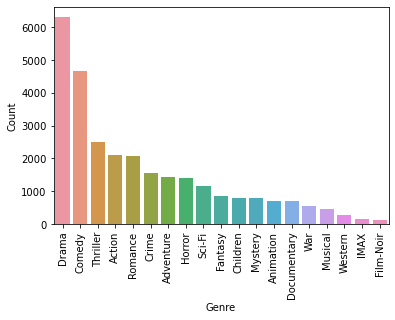

In [18]:
ax = sns.barplot(data=genre_counts, x="Genre", y="Count", order=genre_counts.sort_values('Count', ascending=False).Genre)
ax.tick_params(axis='x', rotation=90)


# Recommender Engine 

In [17]:
def distFn(arr):
    norm = arr/np.linalg.norm(arr, axis=-1)[:, np.newaxis]
    p = np.dot(norm, norm.T)
    dist = 1-p
    return dist


In [18]:
def recommender(k, title, distmatrix):

    reccs = []
    movie = distmatrix.loc[title].sort_values(axis=0)
    
    for y in range(k):
        reccs.append(movie.index[y+1])
    
    return reccs
    
    

In [25]:
data_pca = data.copy(deep=True)
data_pca.drop('year', axis=1, inplace=True)

In [28]:
x = data_pca.loc[:, data_pca.columns[1:]].values
x = StandardScaler().fit_transform(x)

In [29]:
pca = PCA(n_components=.95)
pca_movies = pca.fit_transform(x)

In [30]:
pca_movies.shape

(13265, 678)

In [31]:
pca_cols = ['principal_component'+str(i) for i in range(pca_movies.shape[1])]

pca_df = pd.DataFrame(pca_movies, columns=pca_cols)

In [32]:
pca_df.head()

,principal_component0,principal_component1,principal_component2,principal_component3,principal_component4,principal_component5,principal_component6,principal_component7,principal_component8,principal_component9,...,principal_component668,principal_component669,principal_component670,principal_component671,principal_component672,principal_component673,principal_component674,principal_component675,principal_component676,principal_component677
0,5.132222,18.798872,-16.517664,10.971780,12.235776,12.929198,2.345768,-7.662490,-8.572294,-6.687325,...,0.412996,-1.299405,0.271990,0.126639,-0.051880,0.520836,0.196731,-0.329621,0.616947,-0.076249
1,-11.361463,14.181341,-7.629066,9.812138,2.262788,5.136731,-0.346075,-8.025678,-4.682979,-0.378246,...,-0.495825,-0.506620,0.215286,-0.648411,0.079930,0.060830,-0.340061,-0.343874,0.315687,-0.546412
2,-9.681352,-1.475858,-4.303920,-2.388185,2.140802,1.144971,1.354980,0.429799,-0.486850,-0.889838,...,-0.396636,-0.459113,-0.659042,-0.083726,-0.425410,0.027524,-0.019455,-0.826289,-0.270687,-0.809617
3,-8.141794,-6.541326,-5.382607,-0.885764,0.452023,-2.270653,3.700132,-1.544174,0.148379,2.865696,...,-0.657296,0.141733,-0.200376,-0.650330,0.520379,-0.599329,0.139583,0.064222,-0.112659,-0.293449
4,-10.719279,-2.360187,-8.018455,-0.682728,3.258686,-1.378830,3.942993,-2.127569,-0.541729,0.185650,...,-0.326589,-0.037526,-0.607580,-0.262631,0.291984,0.538384,0.255474,-0.236904,-0.176669,-0.389380


In [33]:
numpy_pca = pca_df.to_numpy()

In [34]:
numpy_pca.shape

(13265, 678)

In [41]:
cos_mat = distFn(numpy_pca)

In [42]:
cos_mat

array([[-8.88178420e-16,  6.58159289e-01,  1.00543601e+00, ...,
         9.72957506e-01,  7.85259347e-01,  9.53708467e-01],
       [ 6.58159289e-01, -2.44249065e-15,  9.34449090e-01, ...,
         1.08545155e+00,  9.87284754e-01,  1.02929840e+00],
       [ 1.00543601e+00,  9.34449090e-01,  9.99200722e-16, ...,
         9.91497963e-01,  1.08936233e+00,  9.90497544e-01],
       ...,
       [ 9.72957506e-01,  1.08545155e+00,  9.91497963e-01, ...,
         1.44328993e-15,  6.72621289e-01,  6.83472569e-01],
       [ 7.85259347e-01,  9.87284754e-01,  1.08936233e+00, ...,
         6.72621289e-01, -1.33226763e-15,  5.73996294e-01],
       [ 9.53708467e-01,  1.02929840e+00,  9.90497544e-01, ...,
         6.83472569e-01,  5.73996294e-01, -1.33226763e-15]])

In [43]:
cos_mat.dtype

dtype('float64')

In [44]:
cos_mat = cos_mat.astype(np.float16)

In [45]:
cos_mat.dtype

dtype('float16')

In [46]:
cos_mat

array([[-0.    ,  0.658 ,  1.006 , ...,  0.973 ,  0.785 ,  0.9536],
       [ 0.658 , -0.    ,  0.9346, ...,  1.086 ,  0.9873,  1.029 ],
       [ 1.006 ,  0.9346,  0.    , ...,  0.9917,  1.09  ,  0.9907],
       ...,
       [ 0.973 ,  1.086 ,  0.9917, ...,  0.    ,  0.673 ,  0.6836],
       [ 0.785 ,  0.9873,  1.09  , ...,  0.673 , -0.    ,  0.574 ],
       [ 0.9536,  1.029 ,  0.9907, ...,  0.6836,  0.574 , -0.    ]],
      dtype=float16)

In [48]:
sys.getsizeof(cos_mat)

351920570

In [49]:
t_list = data.title.to_list()

cos_df = pd.DataFrame(cos_mat, columns=t_list, index=t_list)
cos_df.head()

,Toy Story,Jumanji,Grumpier Old Men,Waiting to Exhale,Father of the Bride Part II,Heat,Sabrina,Tom and Huck,Sudden Death,GoldenEye,...,Ad Astra,It: Chapter Two,In the Tall Grass,Joker,Ready or Not,Zombieland: Double Tap,Downton Abbey,El Camino: A Breaking Bad Movie,Dave Chappelle: Sticks & Stones,Between Two Ferns: The Movie
Toy Story,-0.000000,0.658203,1.005859,1.097656,0.972656,0.956543,0.996582,0.977539,1.130859,0.917969,...,0.901367,0.750488,0.969727,0.770996,0.861328,0.708984,0.964355,0.973145,0.785156,0.953613
Jumanji,0.658203,-0.000000,0.934570,0.960938,0.888184,1.164062,0.894531,0.719727,0.837891,0.858398,...,1.156250,0.815918,0.958496,1.079102,0.830566,0.856934,1.108398,1.085938,0.987305,1.029297
Grumpier Old Men,1.005859,0.934570,0.000000,0.703613,0.492432,1.174805,0.681152,0.757324,0.851562,0.950684,...,1.179688,1.025391,1.179688,1.261719,1.004883,0.985352,0.949707,0.991699,1.089844,0.990723
Waiting to Exhale,1.097656,0.960938,0.703613,0.000000,0.642090,1.249023,0.549316,0.586426,0.837402,1.040039,...,1.297852,1.108398,1.253906,1.356445,1.091797,1.116211,0.811523,1.203125,1.298828,1.134766
Father of the Bride Part II,0.972656,0.888184,0.492432,0.642090,-0.000000,1.213867,0.600586,0.753418,0.859375,0.966309,...,1.216797,1.010742,1.169922,1.210938,0.894043,1.009766,0.917480,1.095703,1.105469,1.033203


In [50]:
pickle.dump(cos_df, open("cosdist_mat.pkl", "wb"))